# Exploratory data analysis of the ai-ready training images (level 3)

`Output:` level 3 ai-ready data (see the `Download_Data` notebook to get this data)

This notebook shows you how to view the set of images used in this project and computes some simple statistics. There are 14 different "images" of an alluvial fan in Eberswalde crater on Mars, taken by different spacecraft. Images is in quotes because some of the data are black and white images, some are IR images, some are digital elevation maps (DEMs), and some are slope maps.

### Import important libraries and set your working directory

In [8]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import numpy as np

# Path to your working directory to store the images
data_path = "/Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/data/ai_ready/" # This is an example, change it to your own path


### Load in the training images to view and analyze

In [9]:
blendDEM = rxr.open_rasterio(data_path + "blendDEM_aiready.tif", cache=False)
blendSLOPE = rxr.open_rasterio(data_path + "blendSLOPE_aiready.tif", cache=False)

ctxDEM = rxr.open_rasterio(data_path + "ctxDEM_aiready.tif", cache=False)
ctxIMG = rxr.open_rasterio(data_path + "ctxIMG_aiready.tif", cache=False)
ctxSLOPE = rxr.open_rasterio(data_path + "ctxSLOPE_aiready.tif", cache=False)

dayIR = rxr.open_rasterio(data_path + "dayIR_aiready.tif", cache=False)
nightIR = rxr.open_rasterio(data_path + "nightIR_aiready.tif", cache=False)

hrscND = rxr.open_rasterio(data_path + "hrscND_aiready.tif", cache=False)
hrscP1 = rxr.open_rasterio(data_path + "hrscP1_aiready.tif", cache=False)
hrscP2 = rxr.open_rasterio(data_path + "hrscP2_aiready.tif", cache=False)
hrscS1 = rxr.open_rasterio(data_path + "hrscS1_aiready.tif", cache=False)
hrscS2 = rxr.open_rasterio(data_path + "hrscS2_aiready.tif", cache=False)

training_imgs = [blendDEM, blendSLOPE, ctxDEM, ctxIMG, ctxSLOPE, dayIR, nightIR, hrscND, hrscP1, hrscP2, hrscS1, hrscS2]
training_names = ['blendDEM', 'blendSLOPE', 'ctxDEM', 'ctxIMG', 'ctxSLOPE', 'dayIR', 'nightIR', 'hrscND', 'hrscP1', 'hrscP2', 'hrscS1', 'hrscS2']


### Plot the training images

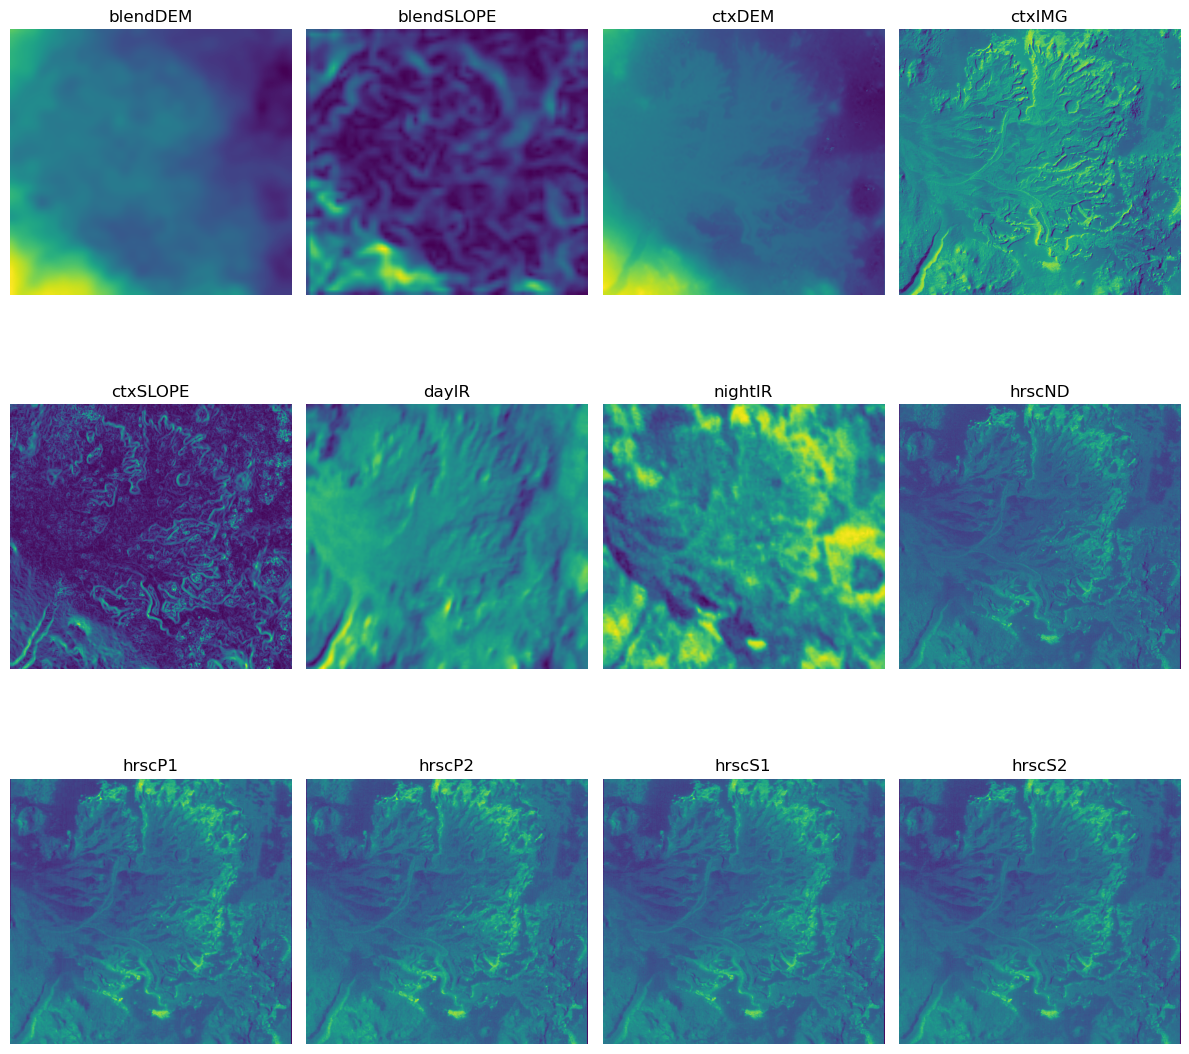

In [10]:
# Set the number of images per row
n_cols = 4
n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the training images and plot them
for i, ax in enumerate(axes.flat):
    if i < len(training_imgs):
        img = training_imgs[i].squeeze()  # Remove extra dimensions if present
        ax.imshow(img, cmap='viridis')  # You can choose a different colormap if desired
        ax.set_title(training_names[i])
        ax.axis('off')  # Turn off the axes
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()

You can see how the same fan is represented differently depending on the resolution and type of data acquired from the spacecraft

### Plot histograms of pixel values

Here we see that all of the images have been normalized so that their pixel values are between 0 and 1. This makes it straightforward to compare patterns between different images

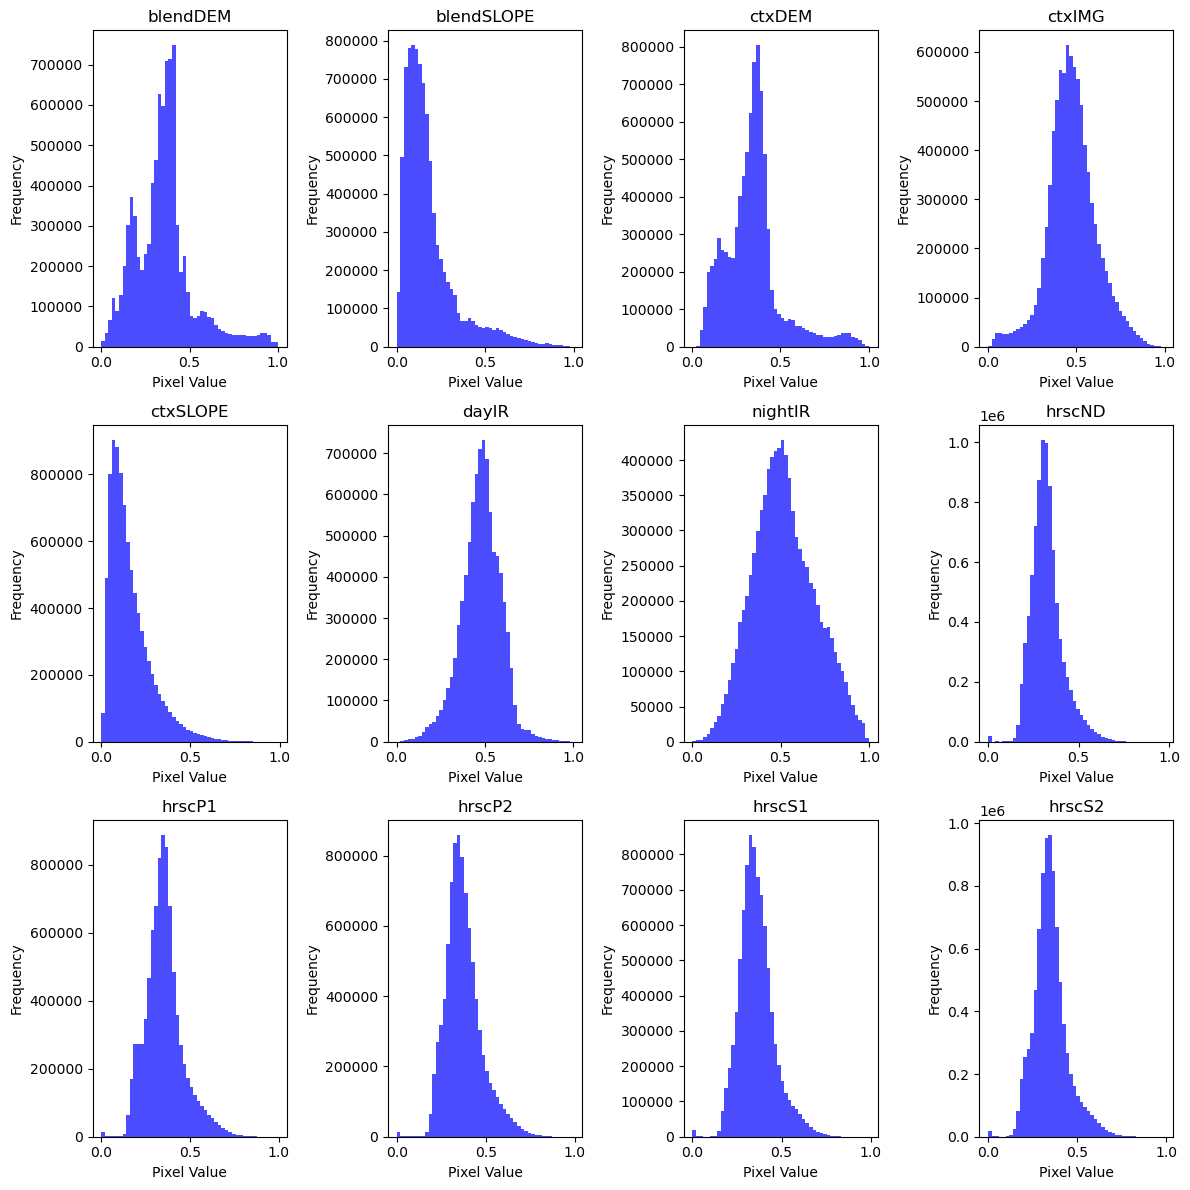

In [11]:
# Set the number of images per row
n_cols = 4
n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# Create a figure with subplots for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the training images and plot their histograms
for i, ax in enumerate(axes.flat):
    if i < len(training_imgs):
        img = training_imgs[i].squeeze().values.flatten()  # Flatten the pixel values to 1D
        ax.hist(img, bins=50, color='blue', alpha=0.7)  # Create the histogram with 50 bins
        ax.set_title(training_names[i])
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()


These distributions are approximately gaussian or power law, except for the DEMs, which have a unique, somewhat bi-modal distribution.

## Print image statistics

In [12]:
# Loop through each training image and its corresponding name
for img, name in zip(training_imgs, training_names):
    # Calculate the mean of the image pixel values
    mean = img.mean().item()
    
    # Calculate the standard deviation of the image pixel values
    std = img.std().item()
    
    # Find the minimum pixel value in the image
    min_val = img.min().item()
    
    # Find the maximum pixel value in the image
    max_val = img.max().item()
    
    # Print the statistics for the current image
    print(f"{name}: Mean={mean:.2f}, Std={std:.2f}, Min={min_val:.2f}, Max={max_val:.2f}")

blendDEM: Mean=0.35, Std=0.17, Min=0.00, Max=1.00
blendSLOPE: Mean=0.18, Std=0.15, Min=0.00, Max=1.00
ctxDEM: Mean=0.34, Std=0.16, Min=0.00, Max=1.00
ctxIMG: Mean=0.48, Std=0.14, Min=0.00, Max=1.00
ctxSLOPE: Mean=0.16, Std=0.12, Min=0.00, Max=0.99
dayIR: Mean=0.48, Std=0.11, Min=0.00, Max=1.00
nightIR: Mean=0.52, Std=0.18, Min=0.00, Max=1.00
hrscND: Mean=0.33, Std=0.09, Min=0.00, Max=0.97
hrscP1: Mean=0.35, Std=0.11, Min=0.00, Max=0.99
hrscP2: Mean=0.38, Std=0.10, Min=0.00, Max=0.99
hrscS1: Mean=0.36, Std=0.10, Min=0.00, Max=0.99
hrscS2: Mean=0.35, Std=0.10, Min=0.00, Max=0.99


## Correlation matrix

Here we plot a correllation matrix of the images to see how similar or different they are. This helps us understand variation in our dataset.

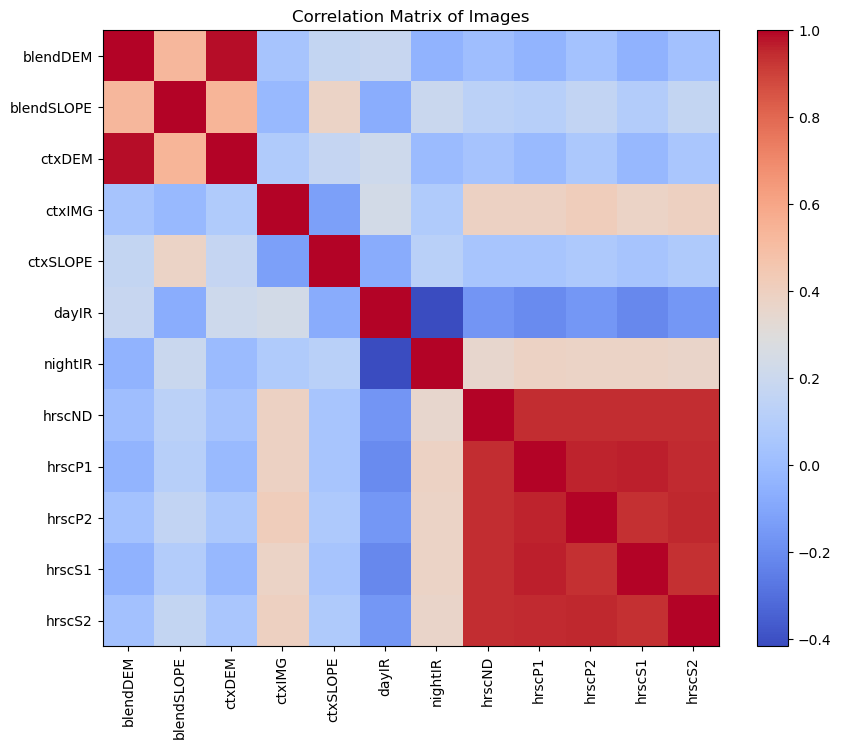

In [13]:
# Compute and plot a correlation matrix
flattened_imgs = [img.values.flatten() for img in training_imgs]
correlation_matrix = np.corrcoef(flattened_imgs)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(training_names)), training_names, rotation=90)
plt.yticks(range(len(training_names)), training_names)
plt.title('Correlation Matrix of Images')
plt.show()

This shows nicely how the following groups are similar to one another:
- The DEMs are similar because they are both tracking elevation data
- The slope matps are similar because they both track slope data
- Images from the same source are similar, for example the HRSC images

Interstingly, the DayIR and NightIR images are very anticorrelated despite both being IR data from THEMIS.

In [ ]:
#### --- Some extra code for later ----

# val_map = rxr.open_rasterio(img_path + "validation_map.tif", cache=False)

# # Set the number of images per row
# n_cols = 4
# n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# # Create a figure with subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# # Loop through the training images and plot them
# for i, ax in enumerate(axes.flat):
#     if i < len(training_imgs):
#         img = training_imgs[i].squeeze()  # Remove extra dimensions if present
#         ax.imshow(img, cmap='gray')  # Underlying image in grayscale
        
#         # Overlay val_map with viridis colormap and semi-transparency
#         ax.imshow(val_map.squeeze(), cmap='viridis', alpha=0.3)

#         ax.set_title(training_names[i])  # Title corresponding to the variable name
#         ax.axis('off')  # Turn off the axes
#     else:
#         ax.axis('off')  # Turn off any unused subplots

# plt.tight_layout()
# plt.show()